<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Dummy variables
---



## Learning Objectives

### Core

- Know the difference between numerical and categorical predictors
- Use `pd.get_dummies` to transform categorical variables into numerical format
- Know about redundant variables

### Target

- Fit a regression model using both numerical and categorical predictors
- Interpret the model coefficients of categorical predictor variables


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li></ul></li><li><span><a href="#Categorical-predictors" data-toc-modified-id="Categorical-predictors-2">Categorical predictors</a></span></li><li><span><a href="#Example-for-dummifying" data-toc-modified-id="Example-for-dummifying-3">Example for dummifying</a></span><ul class="toc-item"><li><span><a href="#Seaborn-tips-data" data-toc-modified-id="Seaborn-tips-data-3.1">Seaborn tips data</a></span></li><li><span><a href="#Dummify-one-column" data-toc-modified-id="Dummify-one-column-3.2">Dummify one column</a></span></li><li><span><a href="#Dummify-all-variables" data-toc-modified-id="Dummify-all-variables-3.3">Dummify all variables</a></span><ul class="toc-item"><li><span><a href="#Redundant-variables" data-toc-modified-id="Redundant-variables-3.3.1">Redundant variables</a></span></li></ul></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.4">Fit the model</a></span><ul class="toc-item"><li><span><a href="#Choose-outcome-and-predictor-variables" data-toc-modified-id="Choose-outcome-and-predictor-variables-3.4.1">Choose outcome and predictor variables</a></span></li><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-3.4.2">Create train-test split</a></span></li><li><span><a href="#Rescale-the-variables" data-toc-modified-id="Rescale-the-variables-3.4.3">Rescale the variables</a></span></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-3.4.4">Linear regression model</a></span></li></ul></li><li><span><a href="#Drop-redundant-variables" data-toc-modified-id="Drop-redundant-variables-3.5">Drop redundant variables</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.6">Fit the model</a></span><ul class="toc-item"><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-3.6.1">Create train-test split</a></span></li><li><span><a href="#Rescale-the-variables" data-toc-modified-id="Rescale-the-variables-3.6.2">Rescale the variables</a></span></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-3.6.3">Linear regression model</a></span></li></ul></li><li><span><a href="#Interpret-the-model-coefficients-of-dummy-variables" data-toc-modified-id="Interpret-the-model-coefficients-of-dummy-variables-3.7">Interpret the model coefficients of dummy variables</a></span></li></ul></li><li><span><a href="#Dummy-practice" data-toc-modified-id="Dummy-practice-4">Dummy practice</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Categorical predictors

You may note that in our examples so far our independent variable $X$ is quantitative. This need not be the case. In many cases, we'll use qualitative variables to explain quantitative outcomes. Some examples:

- One's sex and education are often linked to income.
- The day of the week might explain a bar's profits or the month of the year might affect an airlines' revenues.
- Whether or not someone has children above 5 might help to predict when he/she will go on holiday.

If you have a variable that is categorical, you will need to "dummy code" it:
- Check out [a worked out example](https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/) 
- and/or [the Pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html) to see this implemented in Python.

Practically, dummy variables come into play more in **multiple linear regression** (MLR), but it can technically apply to SLR and it's something of which you should be aware of.

The following dataset contains categorical variables. 

- Pick one of the categorical variables, for example `sex`.
- Use `pd.get_dummies` to create a dummy variable.
- Fit `tips` on one of the resulting dummy variables (for example `Male`).
- How do you interpret the regression coefficients?

## Example for dummifying

### Seaborn tips data

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head(3)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


We want to predict the amount of tip given the other quantities. Correlations can only be calculated between the numerical variables.

In [3]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Dummify one column

To make use of the categorical variables, we have to dummify them. We use panda's `pd.get_dummies` function.

We can apply it to a choice of columns, for example `sex`.

In [4]:
tips_temp = pd.get_dummies(tips,columns=['sex'])
tips_temp.head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


Of course the columns for male and female are completely anticorrelated.

In [5]:
tips_temp[['sex_Male','sex_Female']].corr()

,sex_Male,sex_Female
sex_Male,1.0,-1.0
sex_Female,-1.0,1.0


### Dummify all variables

We can also simply apply `pd.get_dummies` to the whole dataframe. All object type columns will be transformed. If the categories in a column are coded numerically (like 1, 2, 3) it will be necessary to tell pandas to transform that column by indicating it explicitly.

In [6]:
tips_dum = pd.get_dummies(tips)
tips_dum.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


#### Redundant variables

> For binary variables we see the anticorrelations in the heatmap (not being smoker implies being non-smoker). 

> For variables with more than two categories, we know that we have one category if it is not in any of the remaining categories. For example, if the entry for days from Monday to Saturday is zero, we know that we have Sunday. That is not reflected in pairwise correlation, but still we have a variable which is redundant.

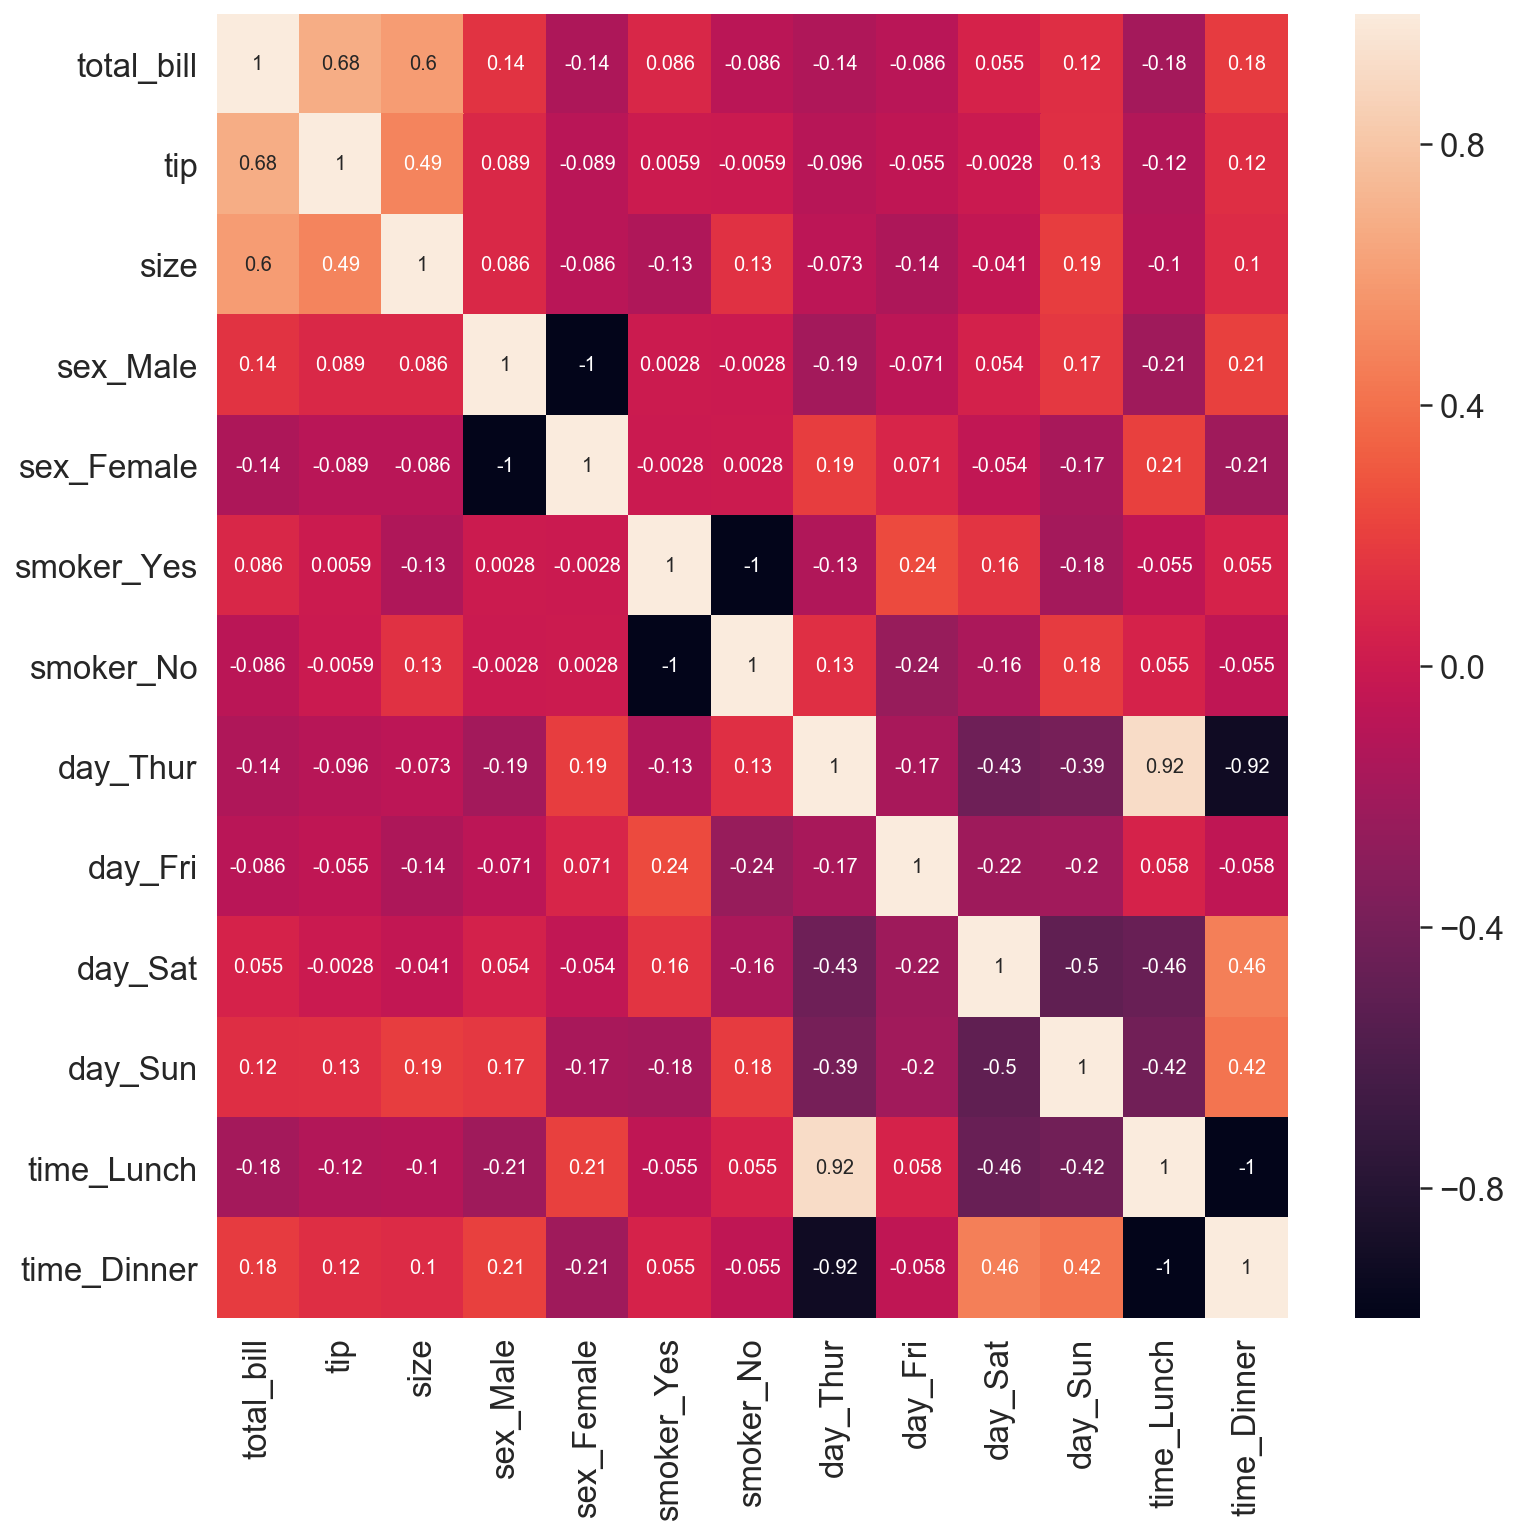

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(tips_dum.corr(),annot=True,ax=ax)
plt.show()

In [8]:
tips_dum = pd.get_dummies(tips)
tips_dum.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


### Fit the model

Now we fit the model. We use rescaling to be able to apply regularized regression. Rescaling can be applied to dummified variables. The result will be that the possible values 0 and 1 are translated into one positive and one negative number.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Choose outcome and predictor variables

In [10]:
y = tips_dum.pop('tip')
X = tips_dum

#### Create train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Rescale the variables

> Note that while we use `.fit_transform` on the training data,
we only use `.transform` on the test data. This reflects that we cannot rescale with the mean and standard deviation of data which we have not seen before.

In [12]:
X_train.describe()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,19.530615,2.564103,0.661538,0.338462,0.353846,0.646154,0.271795,0.066667,0.323077,0.338462,0.292308,0.707692
std,8.902420,0.979029,0.474404,0.474404,0.479393,0.479393,0.446030,0.250086,0.468856,0.474404,0.455994,0.455994
min,5.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.325000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.290000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23.390000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,48.330000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X_test.describe()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.00000
mean,20.802041,2.591837,0.571429,0.428571,0.489796,0.510204,0.183673,0.122449,0.489796,0.204082,0.22449,0.77551
std,8.921021,0.839602,0.500000,0.500000,0.505076,0.505076,0.391230,0.331201,0.505076,0.407206,0.42157,0.42157
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,13.420000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000
50%,20.650000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000
75%,25.280000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000
max,50.810000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [14]:
scaler = StandardScaler()

In [15]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [16]:
X_test.describe()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.143186,0.028401,-0.190432,0.190432,0.284317,-0.284317,-0.198077,0.223627,0.356502,-0.283989,-0.149108,0.149108
std,1.004669,0.859794,1.056666,1.056666,1.056287,1.056287,0.879397,1.327756,1.080026,0.860561,0.926888,0.926888
min,-1.853764,-1.601718,-1.398051,-0.715282,-0.740013,-1.351328,-0.610933,-0.267261,-0.690849,-0.715282,-0.642685,-1.555973
25%,-0.688166,-0.577669,-1.398051,-0.715282,-0.740013,-1.351328,-0.610933,-0.267261,-0.690849,-0.715282,-0.642685,0.642685
50%,0.126063,-0.577669,0.715282,-0.715282,-0.740013,0.740013,-0.610933,-0.267261,-0.690849,-0.715282,-0.642685,0.642685
75%,0.647485,0.446380,0.715282,1.398051,1.351328,0.740013,-0.610933,-0.267261,1.447494,-0.715282,-0.642685,0.642685
max,3.522626,1.470429,0.715282,1.398051,1.351328,0.740013,1.636840,3.741657,1.447494,1.398051,1.555973,0.642685


#### Linear regression model

In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44159401897773914
0.48758172543493583


In [18]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,0.721351
1,size,0.234427
2,sex_Male,-0.011611
3,sex_Female,0.011611
4,smoker_Yes,-0.036140
5,smoker_No,0.036140
6,day_Thur,-0.128475
7,day_Fri,0.032704
8,day_Sat,0.057806
9,day_Sun,0.046421


### Drop redundant variables

We can avoid having redundant variables by indicating `drop_first=True`.
This is really important because otherwise we might end up with 
problems in our regression models.

In [19]:
tips_dum = pd.get_dummies(tips,drop_first=True)
tips_dum.head()
y = tips_dum.pop('tip')
X = tips_dum
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


### Fit the model

#### Create train-test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Rescale the variables

> Note that while we use `.fit_transform` on the training data,
we only use `.transform` on the test data. This reflects that we cannot rescale with the mean and standard deviation of data which we have not seen before.

In [21]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [22]:
X_train.smoker_No.unique()

array([ 0.74001287, -1.35132785])

In [23]:
tips.smoker.value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

#### Linear regression model

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.4415940189777392
0.4875817254349357


In [25]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,0.721351
1,size,0.234427
2,sex_Female,0.023222
3,smoker_No,0.072280
4,day_Fri,0.104739
5,day_Sat,0.192855
6,day_Sun,0.183069
7,time_Dinner,-0.207138


### Interpret the model coefficients of dummy variables

The model coefficients of categorical predictors can be interpreted in the following way.

Our model will contain a contribution to the outcome variable like

$$
\beta_{\rm smoker\_No}\ x_{\rm smoker\_no} \approx 0.07\ x_{\rm smoker\_no}
$$

Originally, we can have either $x_{\rm smoker\_no}=0$ or $x_{\rm smoker\_no}=1$. Only in the second case there would be a contribution. This would be interpreted in the following way:

> The tip, i.e. the outcome variable $y$, will be 0.07 $ higher for non-smokers than for smokers.

After rescaling we have in fact 0.74 and -1.35 as possible values for $x_{\rm smoker\_no}$. The two possibilities will either lead to an increase or a decrease of tip as given by the product of the coefficient and the $x$-value.

## Dummy practice

Now practice dummifying on the autostats dataset.

- Decide which columns should be dummified.
- It won't make sense to create as many dummy variables as observations. 
    - Rather try to create categories, for example the car brand (this is the first word in column name).
    - To extract the brand names, remember the `.map` function and the `.split` function for strings.
    - Note that there are some spelling mistakes in the car brand names. 
    - Remember panda's `.replace` function to replace entries in a dataframe column using a dictionary.
- Don't forget to remove missing values (which might not be encoded properly as `NaN`).
- Use continuous as well as dummified variables to predict `mpg` with linear regression.

Which categories are most predictive of the `mpg`?

In [125]:
df = pd.read_csv('../../../../resource-datasets/auto_stats/Auto.csv')

In [147]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,maker
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [127]:
makers = df['name'].apply(lambda x: x.split())

maker = []
for i in makers:
    maker.append(i[0])

df['maker'] = maker

In [128]:
df['maker'].replace({'mercedes-benz':'mercedes', 'toyouta':'toyota', 'chevy':'chevrolet',
                    'vokswagen':'volkswagen','vw':'volkswagen','chevroelt':'chevrolet','maxda':'mazda',
                     'capri':'ford'},inplace=True)

In [129]:
df.describe(include='all')

# I can see horsepower has some erroneous data making it a string, let's see how many rows:

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,maker
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.000000,397,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,304,29
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto,ford
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6,52
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN,NaN


In [130]:
df = df[df['horsepower']!='?']
df['horsepower'] = pd.to_numeric(df['horsepower'])

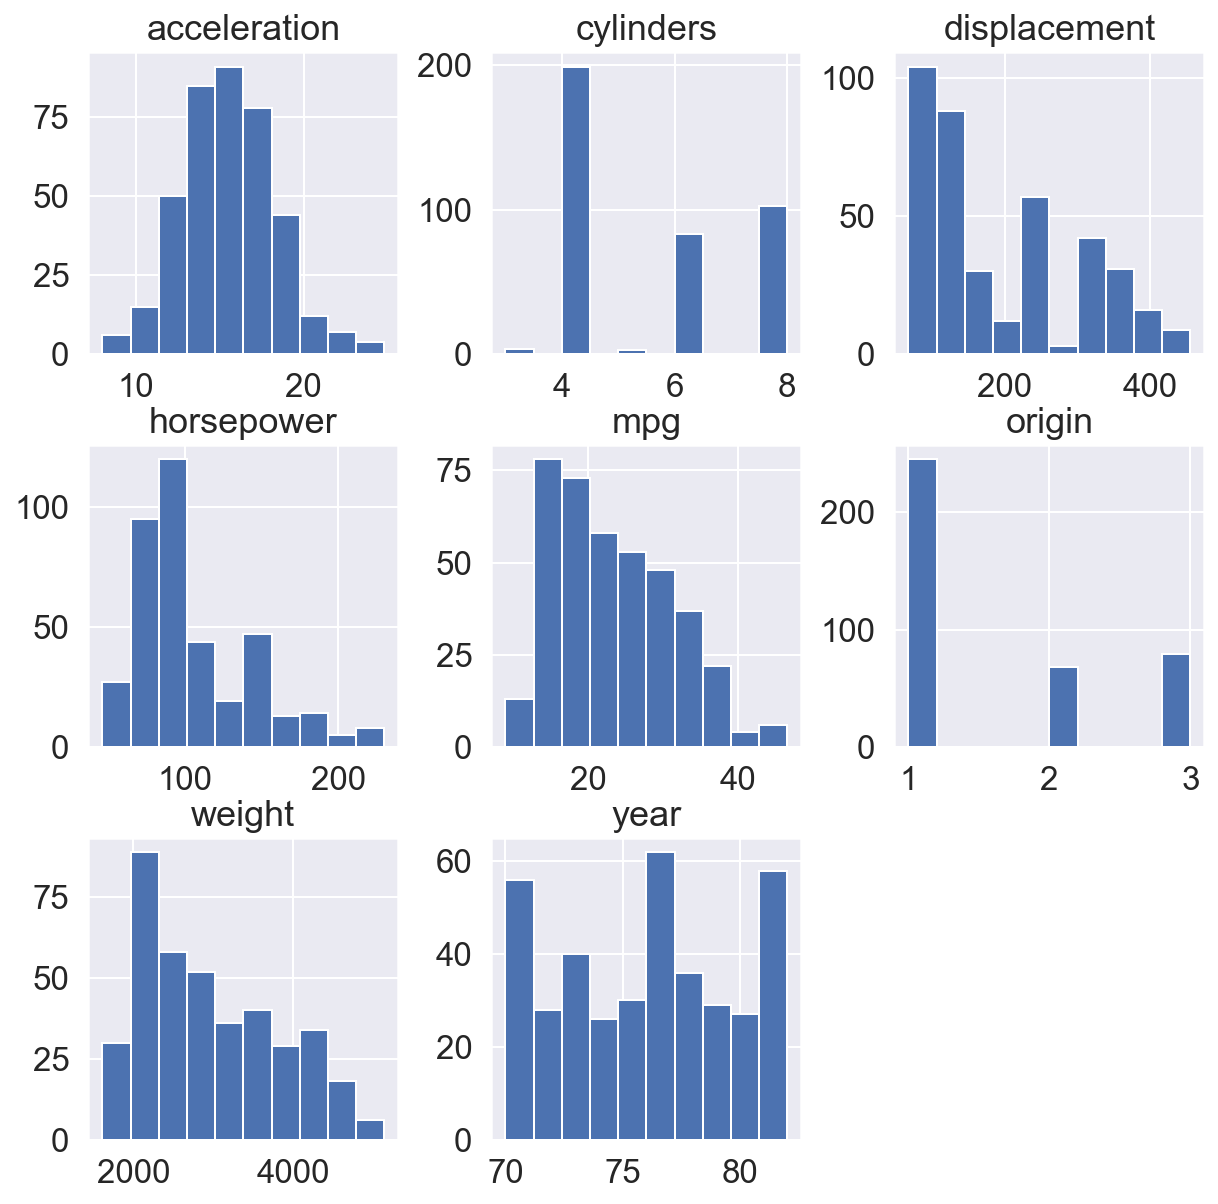

In [131]:
df.hist(figsize=(10,10));

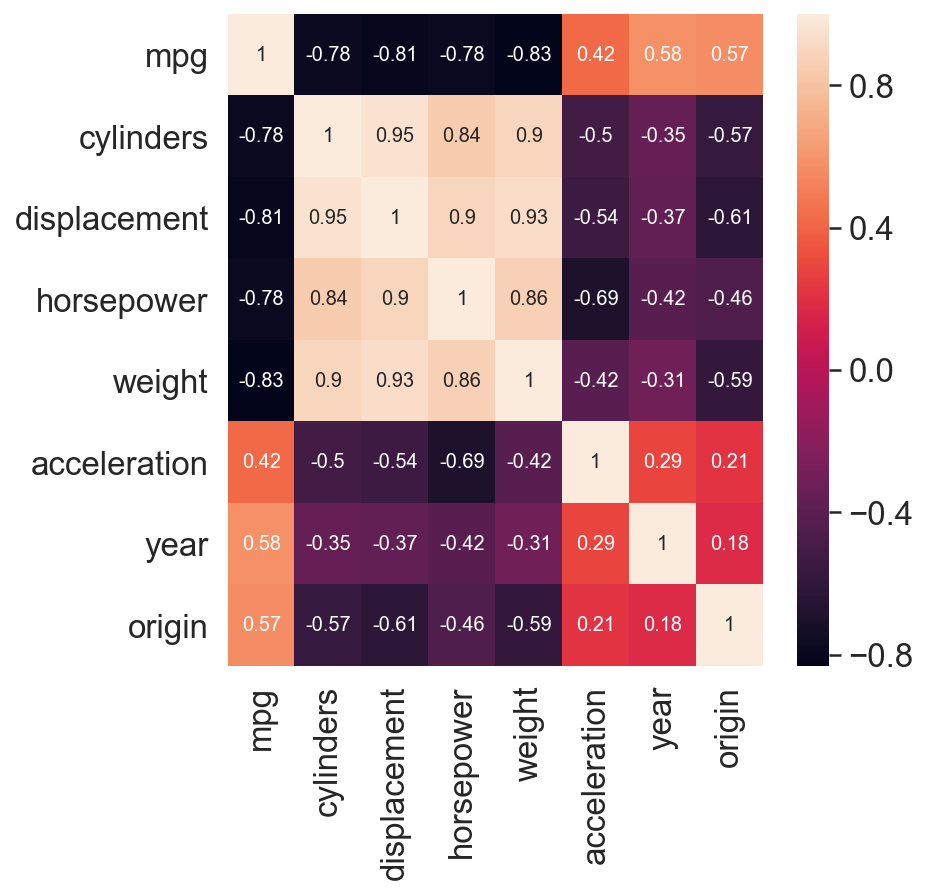

In [135]:
# choosing which variables to focus on for mpg modelling:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show;
# looks like pretty much all of them.

In [136]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,maker
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [142]:
df_dum.columns

Index(['origin', 'maker_audi', 'maker_bmw', 'maker_buick', 'maker_cadillac',
       'maker_chevrolet', 'maker_chrysler', 'maker_datsun', 'maker_dodge',
       'maker_fiat', 'maker_ford', 'maker_hi', 'maker_honda', 'maker_mazda',
       'maker_mercedes', 'maker_mercury', 'maker_nissan', 'maker_oldsmobile',
       'maker_opel', 'maker_peugeot', 'maker_plymouth', 'maker_pontiac',
       'maker_renault', 'maker_saab', 'maker_subaru', 'maker_toyota',
       'maker_triumph', 'maker_volkswagen', 'maker_volvo'],
      dtype='object')

In [143]:
df_dum2 = pd.get_dummies(df[['origin','maker']],drop_first=False)
df_dum2.columns

Index(['origin', 'maker_amc', 'maker_audi', 'maker_bmw', 'maker_buick',
       'maker_cadillac', 'maker_chevrolet', 'maker_chrysler', 'maker_datsun',
       'maker_dodge', 'maker_fiat', 'maker_ford', 'maker_hi', 'maker_honda',
       'maker_mazda', 'maker_mercedes', 'maker_mercury', 'maker_nissan',
       'maker_oldsmobile', 'maker_opel', 'maker_peugeot', 'maker_plymouth',
       'maker_pontiac', 'maker_renault', 'maker_saab', 'maker_subaru',
       'maker_toyota', 'maker_triumph', 'maker_volkswagen', 'maker_volvo'],
      dtype='object')

In [137]:
# dummifying origin and maker, with drop_first which removes the redundancies:

df_dum = pd.get_dummies(df[['origin','maker']],drop_first=True)
df_dum.head()

y = df.pop('mpg')
X = pd.concat([df.loc[:,'cylinders':'year'],df_dum],axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,maker_audi,maker_bmw,maker_buick,...,maker_peugeot,maker_plymouth,maker_pontiac,maker_renault,maker_saab,maker_subaru,maker_toyota,maker_triumph,maker_volkswagen,maker_volvo
0,8,307.0,130,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165,3693,11.5,70,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150,3436,11.0,70,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,8,304.0,150,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# Now fit, the model, first create the train-test-split:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [139]:
# Now rescale variables... remember we only do .transform on X_test not .fit_transform as we want to re-use
# the mean and std from the training data:

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [140]:
# Now fit the model on the scaled data:

model = LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.839282411719459
0.8321134133840837


In [141]:
# Print the performance:

print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 23.4037568072013


,0,1
0,cylinders,-2.856737e-01
1,displacement,2.282820e+00
2,horsepower,-5.748252e-01
3,weight,-6.071842e+00
4,acceleration,3.839668e-01
5,year,2.777193e+00
6,origin,-3.847708e+12
7,maker_audi,6.540746e+11
8,maker_bmw,2.691905e+11
9,maker_buick,2.899167e-01
